In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from scipy import integrate
from scipy.optimize import curve_fit

In [37]:
A=1
u_list_f_all=[]
u_list_max_all=[]
av_list_all=[]
f_list=np.linspace(1,10,100)
for i,f in enumerate (f_list):
    w=2*np.pi*f
    t = np.linspace(0, 1/f, 101)
    a=A*np.sin(w*t)
    v = integrate.cumtrapz(a,t,initial=0)
    u= integrate.cumtrapz(v,t,initial=0)
    av=u[-1]*f
    u_list_f_all.append(u[-1])
    u_list_max_all.append(max(u))
    av_list_all.append(av)

<IPython.core.display.Javascript object>


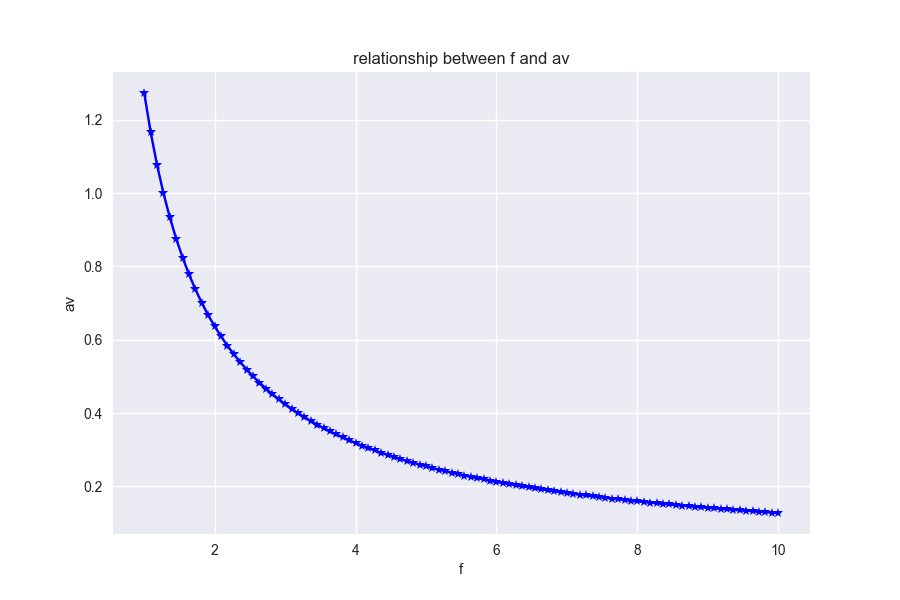

In [31]:
plt.figure(figsize=(9,6))
plt.plot(f_list, av_list_all,'b-*')
plt.xlabel('f')
plt.ylabel('av')
plt.title('relationship between f and av')

In [4]:
def func_av_f(f,a,b):
    return a*f-b*np.sin(1/f)

In [45]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func_av_f, f_list, av_list_all)
#Optimal values for the parameters so that the sum of the squared residuals 
# of f(xdata, *popt) - ydata is minimized

In [46]:
print ("A=1",popt)

A=1 [-0.0002884  -0.17275358]


In [43]:
popt_array=[]
popt_array=popt_array.append(*popt)

In [44]:
print (popt_array)

None


<IPython.core.display.Javascript object>


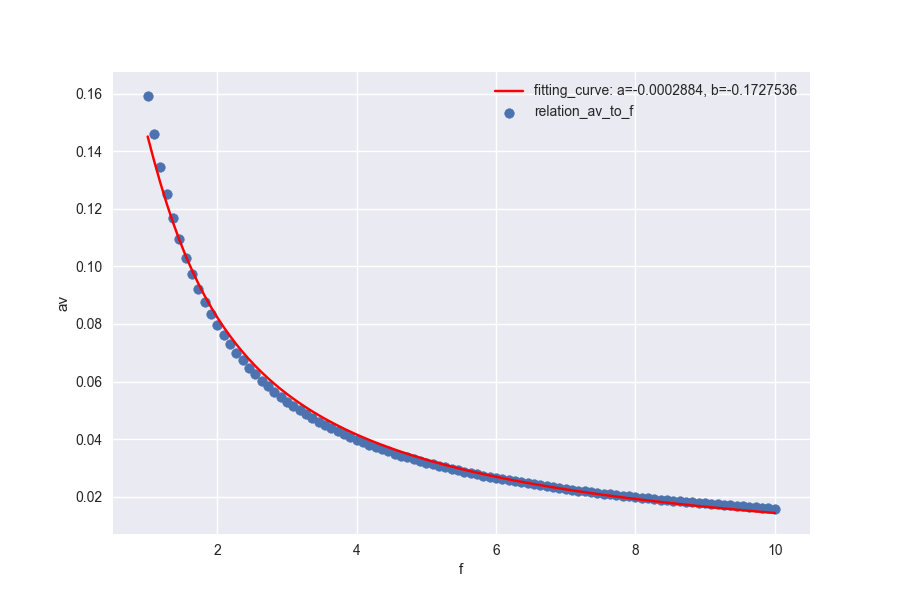

In [47]:
plt.figure(figsize=(9,6))
#plt.scatter(f_list,-0.0002884*f_list+0.17275358*np.sin(1/f_list),color="green")
plt.plot(f_list,func_av_f(f_list, *popt),color="red",label="fitting_curve: a=%5.7f, b=%5.7f" % tuple(popt))
plt.scatter(f_list,av_list_all,label="relation_av_to_f")
plt.xlabel('f')
plt.ylabel('av')
plt.legend()
plt.show()

# 
different A with a and b
A=1 [-0.0002884  -0.17275358]
A=3 [-0.00086521 -0.51826073]
A=5 [-0.00144202 -0.86376788]
A=6 [-0.00173042 -1.03652146]
A=8 [-0.00230723 -1.38202861]

<IPython.core.display.Javascript object>


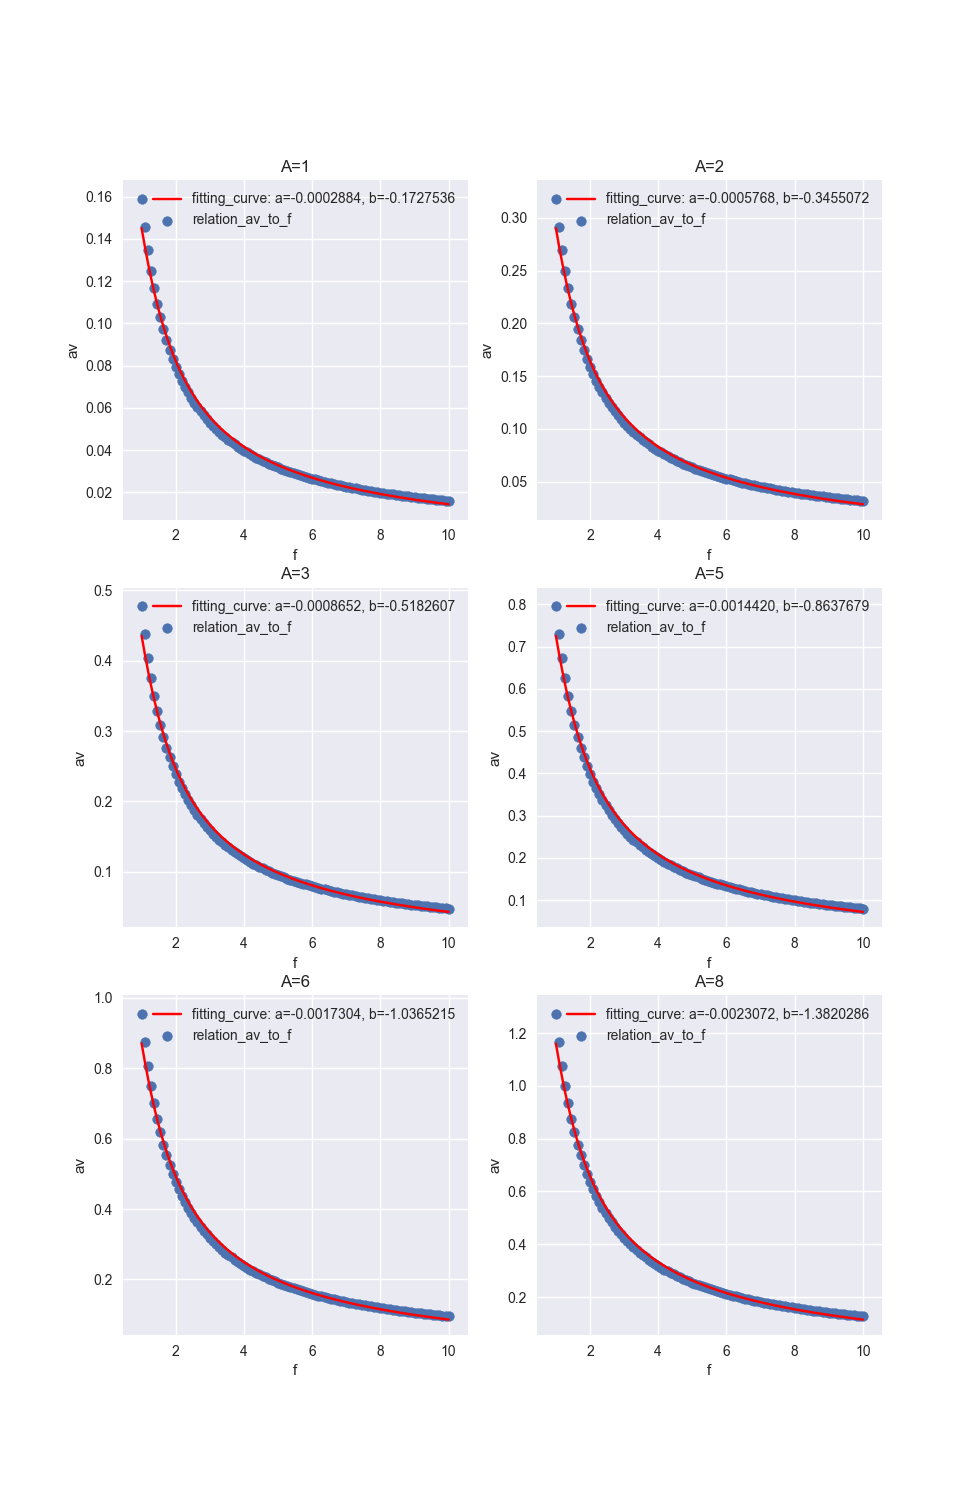

A= 1 [-0.0002884  -0.17275358]
A= 1 fomular:-0.0002884 * f - (-0.1727536) *sin(1/f)
A= 2 [-0.00057681 -0.34550715]
A= 2 fomular:-0.0005768 * f - (-0.3455072) *sin(1/f)
A= 3 [-0.00086521 -0.51826073]
A= 3 fomular:-0.0008652 * f - (-0.5182607) *sin(1/f)
A= 5 [-0.00144202 -0.86376788]
A= 5 fomular:-0.0014420 * f - (-0.8637679) *sin(1/f)
A= 6 [-0.00173042 -1.03652146]
A= 6 fomular:-0.0017304 * f - (-1.0365215) *sin(1/f)
A= 8 [-0.00230723 -1.38202861]
A= 8 fomular:-0.0023072 * f - (-1.3820286) *sin(1/f)


In [11]:
plt.figure(figsize=(9.8,15), dpi=100)
for j,A in enumerate ([1,2,3,5,6,8]):
    u_list_f_all=[]
    u_list_max_all=[]
    av_list_all=[]
    f_list=np.linspace(1,10,100)
    for i,f in enumerate (f_list):
        w=2*np.pi*f
        t = np.linspace(0, 1/f, 101)
        a=A*np.sin(w*t)
        v = integrate.cumtrapz(a,t,initial=0)
        u= integrate.cumtrapz(v,t,initial=0)
        av=u[-1]*f
        u_list_f_all.append(u[-1])
        u_list_max_all.append(max(u))
        av_list_all.append(av)
    popt, pcov = curve_fit(func_av_f, f_list, av_list_all)
    print ("A=",A,popt)
    plt.subplot(3,2,j+1)
    plt.plot(f_list,func_av_f(f_list, *popt),color="red",label="fitting_curve: a=%5.7f, b=%5.7f" % tuple(popt))
    plt.scatter(f_list,av_list_all,label="relation_av_to_f")
    plt.xlabel('f')
    plt.ylabel('av')
    plt.legend()
    plt.title("A="+str(A))
    print ("A=",A, "fomular:" "%5.7f * f - (%5.7f) *sin(1/f)"% tuple(popt) )